In [418]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/erenaldis/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['beta', 'f', 'sample', 'c_']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


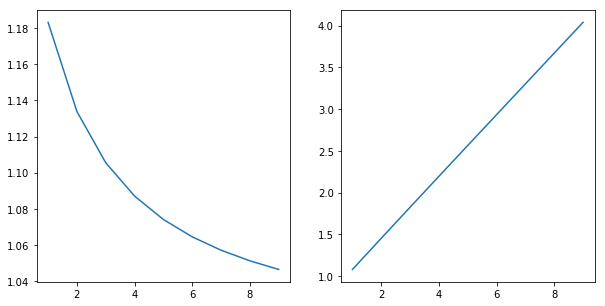

In [250]:
T_ = np.arange(1, 10)
b = np.sqrt((5+2*T_)/(3+2*T_))
a = (3+2*T_)/2 * 1/(b**(3+2*T_))
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(T_, b)
ax2.plot(T_, a)

In [252]:
T =  4
np.mean(abs(np.array(sample(100, T)))), b[T-1], a[T-1]

(4.3417227791870809, 1.087114613009218, 2.1944920920124931)

In [170]:
a = 5/2*(5/7)**(5/2)
B = np.sqrt(7/5)

In [254]:
np.mean(abs(np.array(sample(2, 1))))

3.634727681056781

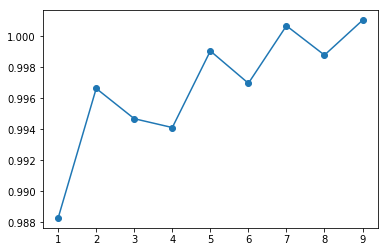

In [273]:
T = np.arange(1, 10)
l = []
for i in range(len(T)):
    l.append(np.mean(abs(np.array(sample(1000, T[i])))))
plot(T, l, 'o-')

In [190]:
T_ = np.arange(1, 10)
l_mean = []
for i in range(len(T_)):
    l_mean.append(np.mean((np.array(sample(1000, T_[i])))))

In [271]:
T_ = np.arange(1, 10)
l_var = []
for i in range(len(T_)):
    l_var.append(np.var((np.array(sample(1000, T_[i])))))
l_var

[1.0128243996090076,
 0.99188111890550668,
 1.0067033104318908,
 1.0111583200787373,
 1.0000955533455325,
 1.0042655657280681,
 0.99689108446648433,
 1.0005963339812263,
 0.9969106876135575]

In [292]:
T=1
def p(T):
    b = np.sqrt((5+2*T)/(3+2*T))
    a = (3+2*T)/2 * 1/(b**(3+2*T))
    d=np.linspace(-b, b)
    return d, a*d**(2+2*T), a, b

#plot(d, a*d**(2+2*T))

a/(3+2*T)*2*b**(3+2*T), b

(3.7473969252593684, 1.1832159566199232)

In [430]:

def icdf(p, T):
    '''
    The inverse cdf that accepts input 0<= p <= 1, a, B, T > 0,  T integer valued
    returns corresponding value x that satisfies F(x) = P(X <= x) = p
    '''
    
    b = np.sqrt((5+2*T)/(3+2*T))
    a = (3+2*T)/2 * 1/(b**(3+2*T))
        
    #base = (p - a*b**(3+2*T)/(3+2*T))
    base = (3+2*T)*p/a - b**(3+2*T)
    
    return sign(base) * abs(base)**(1/(3+2*T))
    
#     B = np.sqrt((5+2*T)/(3+2*T))
#     a = (3+2*T)/2 * ((5+2*T)/(3+2*T))**((-3-2*T)/2)
    
#     if p >= 0.5 and (T % 1 == 0):
#         return ((3+2*T)*p/a - B**(3+2*T))**1/(3+2*T)
#     elif p<0.5 and (T % 1 == 0):
#         return -((3+2*T)*(1-p)/a - B**(3+2*T))**1/(3+2*T)
#     else:
#         raise Exception('Invalid p or T')

def U_sample(n, T, seed=None):
    '''
    Samples with param n = number of samples
    random p = Uniform(0, 1, size=n)
    returns icdf(p)
    '''
    if seed != None:
        l = []
        for i in range(n):
            random.seed(seed+i)
            l.append(icdf(random.random(), T))
        return l
    return [ icdf(random.random(), T) for _ in range(n) ]

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


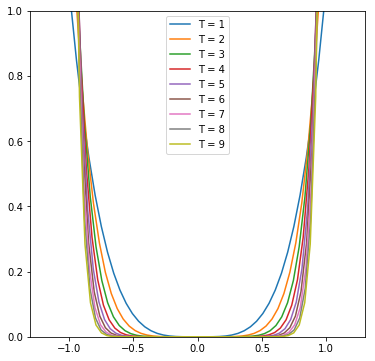

In [316]:
_, ax = plt.subplots(figsize=(6, 6))
T_ = np.arange(1, 10)
for T in T_:
    d, f, a, b = p(T)
    plot(d, f, label='T = '+str(T))
ax.set_ylim([0, 1])
plt.legend(loc=9)
savefig('pdf_T.png')

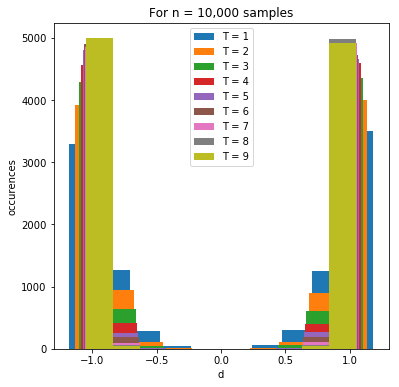

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [809]:
_, ax = plt.subplots(figsize=(6, 6))
T_ = np.arange(1, 10)
for T in T_:
    s=U_sample(10000, T)
    hist(s, label='T = '+str(T))
    

xlabel('d')
ylabel('occurences')
plt.legend(loc=9)
title('For n = 10,000 samples')
savefig('sampled_T.png')

--------------

In [ ]:
#SPSA methods
def perturb_B(t, seed=None):
    if seed!=None:
        d = np.zeros((t.shape))
        for i in range(len(d)):
            random.seed(seed+1)
            d[i] = np.random.binomial(n=1, p=0.5)
            if d[i] == 0:
                d[i] = -1
    else:
        d = np.random.binomial(size=t.shape, n=1, p= 0.5)
        for i in range(len(d)):
            if d[i] == 0:
                d[i] = -1
    return d
def perturb_U(t, T, seed=None):
    return (np.array(U_sample(len(t),T, seed=seed))).reshape(-1 ,)
def g(t, k, c, T, dist = 'B', seed=None):
    if dist == 'B':
        d = perturb_B(t, seed=seed)
    else:
        d = perturb_U(t, T, seed=seed)
    return ((y(t + c/(k+1)**0.101*d) - y(t - c/(k+1)**0.101*d))/(2*c/(k+1)**0.101))/d
def a_k(k, a, n=0):
    if n == 1000:
        return a/(k+50+1)**0.602
    else:
        return a/(k+2)**0.602

------------------

In [776]:
c = 0.05
def L_quad(t):
    return t[0]**2 - t[0]*t[1] + t[1]**2
def y(t):
    return L_quad(t) + np.random.normal(0, c)
def a_k(k, a, n=0):
    if n >= 100:
        return a/(k+10+1)**0.602
    else:
        return a/(k+2)**0.602

t = np.zeros((2,)) + 0.1
g0 = []
for i in range(5000):
    g0.append(g(t, 0,c=c,T=1, dist='B' ))
g0_mag=np.linalg.norm(np.mean(np.abs(g0)))
print('For quad loss')
print('Mean magnitude for g0 =', g0_mag)
a_Blarge = 11**0.602 * 0.1 / g0_mag
print('For k=1000 (A=50), a =', a_Blarge)
a_Bsmall = 1**0.602 * 0.1 / g0_mag
print('For k=10, a =',a_Bsmall)
print('c =', c)

T_ = np.arange(1, 1000, 10)
dict_aT = {}


for T in T_:
    g0 = []
    for i in range(5000):
        g0.append(g(t, 0,c=c,T=T, dist='U' ))
    g0_mag=np.linalg.norm(np.mean(np.abs(g0)))
    a_large = 11**0.602 * 0.1 / g0_mag
    a_small = 1**0.602 * 0.1 / g0_mag
    dict_aT[T] = [a_large, a_small]
    if T == 3:
        print('T=3')
        print('Mean magnitude for g0 =', g0_mag)
        print('For k=1000 (A=50), a =',a_large)
        print('For k=10, a =',a_small)
        print('c = ', c)

#Run the relevant loss funct. first
from tqdm import tqdm_notebook as tqdm
from scipy.stats import ttest_ind
T_ = np.arange(1, 1000, 10)

MSE_B = []
MSE_U = []
for T in T_: #different Ts for U-shaped Perturbation
    dB = {}
    dU = {}
    k_ =100 #k=1000
    #k_= 10 # k = 10
    
    dB[k_] = []
    dU[k_] = []
    
    if k_==10: #k_ == 10:
        aB = a_Bsmall
        
        aU = dict_aT[T][1]
    else:
        aB = a_Blarge
        aU = dict_aT[T][0]
        
    for i in tqdm(range(500)): #MC simulation with 200 iterations
        #initialize t 
        t_B = t
        t_U = t
        
        for k in range(k_): #actual SPSA with max of k_ iterations 
            #(max(k_)/2 loss function evals)
            
            #Bernoulli Perturbation
            
            #paired samples
            t_B = t_B - a_k(k, aB, n=k_)*g(t_B, k, c=c,T=T, dist = 'B',
                                            seed=int(0.5*(i+k)*(i+k+1)+k + 4))
#             #unpaired samples
#             t_B = t_B - a_k(k, aB, n=k_)*g(t_B,
#                                                   k, c=1,T=T, dist = 'B')
            #U-shaped Perturbation
            #paired samples
            t_U = t_U - a_k(k, aU, n=k_)*g(t_U, k, c=c,T=T, dist = 'U',
                                            seed=int(0.5*(i+k)*(i+k+1)+k + 4))
            #unpaired samples
#             t_U = t_U - a_k(k, aU, n=k_)*g(t_U,
#                                                   k, c=1, T=T, dist = 'U')

            
        #append MSE of theta hat (k) to Bernoulli list for k = k
        dB[k_].append(np.linalg.norm(t_B)**2)
        #append MSE of theta hat (k) to U-shaped list for k=k
        dU[k_].append(np.linalg.norm(t_U)**2)
        
    
    
    #print('T=', T, 'aB=', aB, 'aU=', aU)
#     print('T=', T, 'a=', a, 'B=', B, 'Sample Mean Magnitude=', l[T-1], 
#           'Sample Mean=', l_mean[T-1],'Sample Variance', l_var[T-1])
#     print('Var=',Var )
    
    #average the MSEs over monte carlo iterations for each perturbation at each k

    meanMSE_B_k = (np.mean(dB[k_]))
    meanMSE_U_k = (np.mean(dU[k_]))
    MSE_B.append(np.mean(dB[k_]))
    MSE_U.append(np.mean(dU[k_]))
#     print('k=' + str(k_))
#     print('Mean MSE under Bernoulli Perturbation = ' +str(meanMSE_B_k)[:8])
#     print('Mean MSE under U-shaped Perturbation = ' +str(meanMSE_U_k)[:8])
#     #unpaired 2-sample t-test
#     t, p = ttest_ind(dB[k_], dU[k_], equal_var=False)
    #paired 2-sample t-test
    _, p = stats.ttest_rel(dB[k_], dU[k_])
#     print('p-value = ' +str(p))
#     print()
    

For quad loss
Mean magnitude for g0 = 0.567149424635
For k=1000 (A=50), a = 0.74682853055
For k=10, a = 0.176320376353
c = 0.05


/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


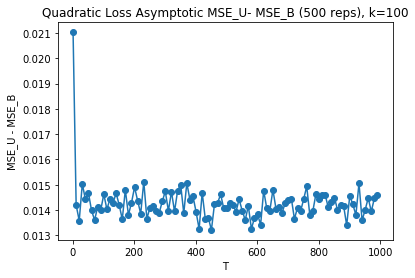

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [777]:
plot(T_, np.array(MSE_U) - np.array(MSE_B), '-o', label='Bernoulli')
#plot(T_, MSE_U, '-o', label='U-shaped')
xlabel('T')
ylabel('MSE_U - MSE_B')
title('Quadratic Loss Asymptotic MSE_U- MSE_B (500 reps), k=100')
savefig('QLoss_k=100_asym.png')

In [756]:
def L_poly(t):
    return t[0]**4 + t[0]**2 + t[0]*t[1] + t[1]**2
def y(t):
    return L_poly(t) + np.random.normal(0, 1)

t = 0.1*np.ones((2,))
g0 = []
for i in range(5000):
    g0.append(g(t, 0,c=1,T=1, dist='B' ))
g0_mag=np.linalg.norm(np.mean(np.abs(g0)))
print('For poly loss')
print('Mean magnitude for g0 =', g0_mag)
a_Blarge = 51**0.602 * 0.1 / g0_mag
print('For k=1000 (A=50), a =', a_Blarge)
a_Bsmall = 1**0.602 * 0.1 / g0_mag
print('For k=10, a =',a_Bsmall)
print('c = 1')

T_ = [1, 3, 14, 100]
dict_aT = {}


for T in T_:
    g0 = []
    for i in range(5000):
        g0.append(g(t, 0,c=1,T=T, dist='U' ))
    g0_mag=np.linalg.norm(np.mean(np.abs(g0)))
    a_large = 51**0.602 * 0.1 / g0_mag
    a_small = 1**0.602 * 0.1 / g0_mag
    dict_aT[T] = [a_large, a_small]
    if T == 3:
        print('T=3')
        print('Mean magnitude for g0 =', g0_mag)
        print('For k=1000 (A=50), a =',a_large)
        print('For k=10, a =',a_small)
        print('c = 1')
    
c=1


#Run the relevant loss funct. first
from tqdm import tqdm_notebook as tqdm
from scipy.stats import ttest_ind
T_ = [1, 3, 14,  100]

MSE_B = []
MSE_U = []
for T in T_: #different Ts for U-shaped Perturbation
    dB = {}
    dU = {}
    k_ =1000 #k=1000
    k_= 10 # k = 10
    
    dB[k_] = []
    dU[k_] = []
    
    if k_==10: #k_ == 10:
        aB = a_Bsmall
        
        aU = dict_aT[T][1]
    else:
        aB = a_Blarge
        aU = dict_aT[T][0]
        
    for i in tqdm(range(10000)): #MC simulation with 200 iterations
        #initialize t 
        t_B = t
        t_U = t
        
        for k in range(k_): #actual SPSA with max of k_ iterations 
            #(max(k_)/2 loss function evals)
            
            #Bernoulli Perturbation
            
            #paired samples
            t_B = t_B - a_k(k, aB, n=k_)*g(t_B, k, c=c,T=T, dist = 'B',
                                            seed=int(0.5*(i+k)*(i+k+1)+k + 4))
#             #unpaired samples
#             t_B = t_B - a_k(k, aB, n=k_)*g(t_B,
#                                                   k, c=1,T=T, dist = 'B')
            #U-shaped Perturbation
            #paired samples
            t_U = t_U - a_k(k, aU, n=k_)*g(t_U, k, c=c,T=T, dist = 'U',
                                            seed=int(0.5*(i+k)*(i+k+1)+k + 4))
            #unpaired samples
#             t_U = t_U - a_k(k, aU, n=k_)*g(t_U,
#                                                   k, c=1, T=T, dist = 'U')

            
        #append MSE of theta hat (k) to Bernoulli list for k = k
        dB[k_].append(np.linalg.norm(t_B)**2)
        #append MSE of theta hat (k) to U-shaped list for k=k
        dU[k_].append(np.linalg.norm(t_U)**2)
        
    
    B = np.sqrt((5+2*T)/(3+2*T))
    a = (3+2*T)/2 * ((5+2*T)/(3+2*T))**((-3-2*T)/2)
    Var = (3+2*T)/(5+2*T) * (B**2)
    
    print('T=', T, 'a=', a, 'B=', B)
#     print('T=', T, 'a=', a, 'B=', B, 'Sample Mean Magnitude=', l[T-1], 
#           'Sample Mean=', l_mean[T-1],'Sample Variance', l_var[T-1])
#     print('Var=',Var )
    
    #average the MSEs over monte carlo iterations for each perturbation at each k

    meanMSE_B_k = (np.mean(dB[k_]))
    meanMSE_U_k = (np.mean(dU[k_]))
    MSE_B.append(np.mean(dB[k_]))
    MSE_U.append(np.mean(dU[k_]))
    print('k=' + str(k_))
    print('Mean MSE under Bernoulli Perturbation = ' +str(meanMSE_B_k)[:8])
    print('Mean MSE under U-shaped Perturbation = ' +str(meanMSE_U_k)[:8])
#     #unpaired 2-sample t-test
#     t, p = ttest_ind(dB[k_], dU[k_], equal_var=False)
    #paired 2-sample t-test
    _, p = stats.ttest_rel(dB[k_], dU[k_])
    print('p-value = ' +str(p))
    print()
    

For poly loss
Mean magnitude for g0 = 3.99373163236
For k=1000 (A=50), a = 0.267041259614
For k=10, a = 0.0250392387885
c = 1
T=3
Mean magnitude for g0 = 4.03622661855
For k=1000 (A=50), a = 0.264229743881
For k=10, a = 0.0247756158042
c = 1


/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


T= 1 a= 1.0780028759292306 B= 1.18321595662
k=10
Mean MSE under Bernoulli Perturbation = 0.049575
Mean MSE under U-shaped Perturbation = 0.202525
p-value = 0.0



T= 3 a= 1.8240499336765614 B= 1.10554159679
k=10
Mean MSE under Bernoulli Perturbation = 0.049575
Mean MSE under U-shaped Perturbation = 0.196308
p-value = 0.0



T= 14 a= 5.88128038475072 B= 1.03175390914
k=10
Mean MSE under Bernoulli Perturbation = 0.049575
Mean MSE under U-shaped Perturbation = 0.193903
p-value = 0.0



T= 100 a= 37.52295160951284 B= 1.00491403451
k=10
Mean MSE under Bernoulli Perturbation = 0.049575
Mean MSE under U-shaped Perturbation = 0.195153
p-value = 0.0



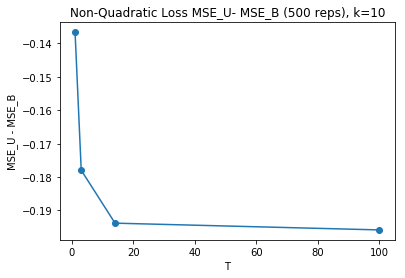

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [751]:
plot(T_, np.array(MSE_U) - np.array(MSE_B), '-o', label='Bernoulli')
#plot(T_, MSE_U, '-o', label='U-shaped')
xlabel('T')
ylabel('MSE_U - MSE_B')
title('Non-Quadratic Loss MSE_U- MSE_B (500 reps), k=10')
savefig('NonQLoss_k=10_fake.png')

-------------------------------

In [788]:
(np.logspace(0, 4, 10)).astype(int)

array([    1,     2,     7,    21,    59,   166,   464,  1291,  3593, 10000])

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [796]:
#function definition
from scipy.optimize import rosen
c = 0.2
def L_rosen(t):
    return rosen(t)
def y(t):
    return L_rosen(t) + np.random.normal(0, 0.2)
def a_k(k, a, n=0):
    if n >= 100:
        return a/(k+10+1)**0.602
    else:
        return a/(k+1)**0.602
#tuning gain sequences
# t = np.ones((10,))
# for i in range(len(t)):
#     if i % 2 == 0: t[i] = 0.99

t= np.zeros((10,))
g0 = []
for i in range(500):
    g0.append(g(t, 0,c=c,T=1, dist='B' ))
g0_mag=np.linalg.norm(np.mean(np.abs(g0)))
print('For rosen loss')
print('Mean magnitude for g0 =', g0_mag)
a_Blarge = 11**0.602 * 0.1 / g0_mag
print('For k=1000 (A=50), a =', a_Blarge)
a_Bsmall = 1**0.602 * 0.1 / g0_mag
print('For k=10, a =',a_Bsmall)
print('c =', c)

T_ = (np.logspace(0, 4, 10)).astype(int)
dict_aT = {}

MSE_B = []
MSE_U = []
for T in T_:
    g0 = []
    for i in range(5000):
        g0.append(g(t, 0,c=c,T=T, dist='U' ))
    g0_mag=np.linalg.norm(np.mean(np.abs(g0)))
    a_large = 11**0.602 * 0.1 / g0_mag
    a_small = 1**0.602 * 0.1 / g0_mag
    dict_aT[T] = [a_large, a_small]
    if T == 3:
        print('T=3')
        print('Mean magnitude for g0 =', g0_mag)
        print('For k=1000 (A=50), a =',a_large)
        print('For k=10, a =',a_small)
        print('c =' , c)
    

#SPSA
from tqdm import tqdm_notebook as tqdm
from scipy import stats
#T_ = [1, 3, 14, 100]
U1 = {}
#k_ =100 #k=1000
k_= 10 # k = 10

for T in T_: #different Ts for U-shaped Perturbation
    dB = {}
    dU = {}
    U1[T] = []
    
    dB[k_] = []
    dU[k_] = []
    
    if k_==10: #k_ == 10:
        aB = a_Bsmall
        
        aU = dict_aT[T][1]
        #aU = dict_aT[T][0]
    else:
        aB = a_Blarge
        aU = dict_aT[T][0]
        #aU = dict_aT[T][1]
        
    for i in tqdm(range(100000)): #MC simulation with 200 iterations
        #initialize t 
        t_B = t
        t_U = t
        #for rosen
        #t_B = 6*np.ones((2,))
        #t_U = 6*np.ones((2,))
        for k in range(k_): #actual SPSA with max of k_ iterations 
            #(max(k_)/2 loss function evals)
            
            #Bernoulli Perturbation
            
            if 0.5*(i+k)*(i+k+1)+k > 2**31:
                t_B = t_B - a_k(k, aB, n=k_)*g(t_B, k, c=c,T=T, dist = 'B',
                                            seed=int((i+k)**(0.5) + i))
                t_U = t_U - a_k(k, aU, n=k_)*g(t_U, k, c=c,T=T, dist = 'U',
                                            seed=int((i+k)**(0.5) + i))
            else:
                t_B = t_B - a_k(k, aB, n=k_)*g(t_B, k, c=c,T=T, dist = 'B',
                                                seed=int(0.5*(i+k)*(i+k+1)+k))
    #             t_B = t_B - a_k(k, aB, n=1000)*g(t_B,
    #                                                   k, c=0.1,T=T, dist = 'B')
                #U-shaped Perturbation
                t_U = t_U - a_k(k, aU, n=k_)*g(t_U, k, c=c,T=T, dist = 'U',
                                                seed=int(0.5*(i+k)*(i+k+1)+k))
    #             t_U = t_U - a_k(k, aU, n=1000)*g(t_U,
    #                                                   k, c=0.1, T=T, dist = 'U')

            
        #append MSE of theta hat (k) to Bernoulli list for k = k
        dB[k_].append(np.linalg.norm(t_B - np.ones(t_B.shape))**2)
        #append MSE of theta hat (k) to U-shaped list for k=k
        dU[k_].append(np.linalg.norm(t_U - np.ones(t_U.shape))**2)
        
    
#     B = np.sqrt((5+2*T)/(3+2*T))
#     a = (3+2*T)/2 * ((5+2*T)/(3+2*T))**((-3-2*T)/2)
#     Var = (3+2*T)/(5+2*T) * (B**2)
    
    print('T=', T, 'aB=', aB, 'aU=', aU, 'c=', c)
#     print('T=', T, 'a=', a, 'B=', B, 'Sample Mean Magnitude=', l[T-1], 
#           'Sample Mean=', l_mean[T-1],'Sample Variance', l_var[T-1])
#     print('Var=',Var )
    
    #average the MSEs over monte carlo iterations for each perturbation at each k

    meanMSE_B_k = (np.mean(dB[k_]))
    meanMSE_U_k = (np.mean(dU[k_]))
    MSE_B.append(np.mean(dB[k_]))
    MSE_U.append(np.mean(dU[k_]))
    print('k=' + str(k_))
    print('Mean MSE under Bernoulli Perturbation = ' +str(meanMSE_B_k)[:8])
    print('Mean MSE under U-shaped Perturbation = ' +str(meanMSE_U_k)[:8])
#     #unmatched 2-sample t-test
#     _, p = stats.ttest_ind(dB[k_], dU[k_], equal_var=True)
    #mathed 2-sample t-test
    _, p = stats.ttest_rel(dB[k_], dU[k_])
    print('p-value = ' +str(p))
    print()
    U1[T].append(dU[k_])

For rosen loss
Mean magnitude for g0 = 24.3595451784
For k=1000 (A=50), a = 0.0173879835728
For k=10, a = 0.00410516695889
c = 0.2


/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


T= 1 aB= 0.00410516695889 aU= 0.00385528666902 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 7.549156
p-value = 4.89111723805e-62



T= 2 aB= 0.00410516695889 aU= 0.00408473613347 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 5.770491
p-value = 2.00446120224e-60



T= 7 aB= 0.00410516695889 aU= 0.00416220085566 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 4.123586
p-value = 2.09712118234e-41



T= 21 aB= 0.00410516695889 aU= 0.00422353176221 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 2.630558
p-value = 1.40743901145e-25



T= 59 aB= 0.00410516695889 aU= 0.00410841277877 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 2.763390
p-value = 3.55265521832e-24



T= 166 aB= 0.00410516695889 aU= 0.00408853865535 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 3.422561
p-value = 1.12816688621e-33



T= 464 aB= 0.00410516695889 aU= 0.00417329141022 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 6.713005
p-value = 1.52821171375e-08



T= 1291 aB= 0.00410516695889 aU= 0.00415710592613 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 6.255701
p-value = 6.19170717303e-09



T= 3593 aB= 0.00410516695889 aU= 0.00415184313802 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 9.173296
p-value = 1.09446777059e-09



T= 10000 aB= 0.00410516695889 aU= 0.00407255323642 c= 0.2
k=10
Mean MSE under Bernoulli Perturbation = 9.326351
Mean MSE under U-shaped Perturbation = 4.682128
p-value = 9.05959360309e-36



In [801]:
MSE_U, MSE_B

([7.5491562032649368e+91,
  5.7704912165781356e+91,
  4.1235867527359916e+91,
  2.6305580739550127e+91,
  2.7633909260963513e+91,
  3.422561249836894e+91,
  6.7130051280283186e+90,
  6.2557012423305269e+90,
  9.1732968381678651e+90,
  4.6821287362943741e+91],
 [9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906,
  9.3263515200836906])

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [773]:
_, p = stats.ttest_rel(U1[1][0], U1[14][0])

In [808]:
np.array(MSE_U) - np.array(MSE_B)

array([  7.54915620e+91,   5.77049122e+91,   4.12358675e+91,
         2.63055807e+91,   2.76339093e+91,   3.42256125e+91,
         6.71300513e+90,   6.25570124e+90,   9.17329684e+90,
         4.68212874e+91])

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


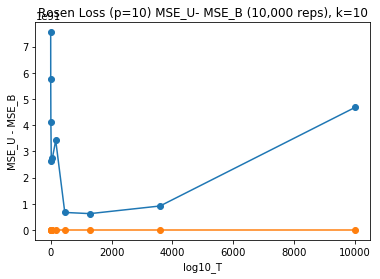

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [805]:
_, ax = plt.subplots()
ax.plot(T_, np.array(MSE_U), '-o', label='Bernoulli')
ax.plot(T_, np.array(MSE_B), '-o', )
#plot(T_, MSE_U, '-o', label='U-shaped')
#
xlabel('log10_T')
ylabel('MSE_U - MSE_B')
title('Rosen Loss (p=10) MSE_U- MSE_B (10,000 reps), k=10')
savefig('RosenLoss_k=10_log.png')

In [503]:
from tqdm import tqdm_notebook as tqdm
from scipy.stats import ttest_ind
T_ = [3, 14, 27, 50, 100, 400, 1000]

for T in T_: #different Ts for U-shaped Perturbation
    dB = {}
    dU = {}
    k_ = [10, 50, 100, 1000]
    for k in k_:
        dB[k] = []
        dU[k] = []
    for i in tqdm(range(100)): #MC simulation with 200 iterations
        #initialize t 
#         t_B = np.ones((2,))
#         t_U = np.ones((2,))
        #for rosen
        t_B = 3*np.ones((2,))
        t_U = 3*np.ones((2,))
        for k in range(max(k_)+1): #actual SPSA with max of k_ iterations 
            #(max(k_)/2 loss function evals)
            
            #Bernoulli Perturbation
            t_B = t_B - a_k(k, 0.1, n=1000)*g(t_B, k, c=0.1,
                                                  T=T, dist = 'B', seed=int(0.5*(i+k)*(i+k+1)+k))
#             t_B = t_B - a_k(k, 0.1, n=1000)*g(t_B,
#                                                   k, c=1,T=T, dist = 'B')
            #U-shaped Perturbation
            t_U = t_U - a_k(k, 1, n=1000)*g(t_U, k, c=0.1,
                                                  T=T, dist = 'U', seed=int(0.5*(i+k)*(i+k+1)+k))
#             t_U = t_U - a_k(k, 0.1, n=1000)*g(t_U,
#                                                   k, c=1, T=T, dist = 'U')

            if k in k_:
                #append MSE of theta hat (k) to Bernoulli list for k = k
                dB[k].append(np.linalg.norm(t_B - np.ones(shape(t_B)))**2)
                #append MSE of theta hat (k) to U-shaped list for k=k
                dU[k].append(np.linalg.norm(t_U - np.ones(shape(t_U)))**2)
        
    
    B = np.sqrt((5+2*T)/(3+2*T))
    a = (3+2*T)/2 * ((5+2*T)/(3+2*T))**((-3-2*T)/2)
    Var = (3+2*T)/(5+2*T) * (B**2)
    
    print('T=', T, 'a=', a, 'B=', B)
#     print('T=', T, 'a=', a, 'B=', B, 'Sample Mean Magnitude=', l[T-1], 
#           'Sample Mean=', l_mean[T-1],'Sample Variance', l_var[T-1])
#     print('Var=',Var )
    
    #average the MSEs over monte carlo iterations for each perturbation at each k
    for k in k_:
        meanMSE_B_k = (np.mean(dB[k]))
        meanMSE_U_k = (np.mean(dU[k]))
        print('k=' + str(k))
        print('Mean MSE under Bernoulli Perturbation = ' +str(meanMSE_B_k)[:5])
        print('Mean MSE under U-shaped Perturbation = ' +str(meanMSE_U_k)[:5])
        #matched 2-sample t-test
        t, p = ttest_ind(dB[k], dU[k], equal_var=False)
        print('p-value = ' +str(p))
    print()

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


T= 3 a= 1.8240499336765614 B= 1.10554159679
k=10
Mean MSE under Bernoulli Perturbation = 1.407
Mean MSE under U-shaped Perturbation = 3.292
p-value = 7.26189116076e-14
k=50
Mean MSE under Bernoulli Perturbation = 1.407
Mean MSE under U-shaped Perturbation = 3.292
p-value = 7.26189116076e-14
k=100
Mean MSE under Bernoulli Perturbation = 1.407
Mean MSE under U-shaped Perturbation = 3.292
p-value = 7.26189116076e-14
k=1000
Mean MSE under Bernoulli Perturbation = 1.407
Mean MSE under U-shaped Perturbation = 3.292
p-value = 7.26189116076e-14



KeyboardInterrupt: 

In [463]:
i=1
k=5
int(0.5*(i+k)*(i+k+1)+k)

26

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [457]:
for T in T_:
    for i in tqdm(range(200)):
        t_B = np.ones((2,))
        t_U = np.ones((2,))
        for k in range(1000):
            t_B = t_B - a_k(k, 0.01897, n=1000)*g(t_B, k, c=0.1,T=T, dist = 'B')
            t_U = t_U - a_k(k, 0.01897, n=1000)*g(t_U, k, c=0.1, T=T, dist = 'U')

            if k == 1:
                tB1.append(np.linalg.norm(t_B)**2)
                tU1.append(np.linalg.norm(t_U)**2)
            if k == 5:
                tB5.append(np.linalg.norm(t_B)**2)
                tU5.append(np.linalg.norm(t_U)**2)
            if k == 10:
                tB10.append(np.linalg.norm(t_B)**2)
                tU10.append(np.linalg.norm(t_U)**2)
            if k == 100:
                tB100.append(np.linalg.norm(t_B)**2)
                tU100.append(np.linalg.norm(t_U)**2)
        tBterm.append(np.linalg.norm(t_B)**2)
        tUterm.append(np.linalg.norm(t_U)**2)
    
    B = np.sqrt((5+2*T)/(3+2*T))
    a = (3+2*T)/2 * ((5+2*T)/(3+2*T))**((-3-2*T)/2)
    Var = (3+2*T)/(5+2*T) * (B**2)
    
    print('T=', T, 'a=', a, 'B=', B)
#     print('T=', T, 'a=', a, 'B=', B, 'Sample Mean Magnitude=', l[T-1], 
#           'Sample Mean=', l_mean[T-1],'Sample Variance', l_var[T-1])
#     print('Var=',Var )
    
    print('k=1')
    tB1_mean = np.mean(tB1)
    tU1_mean = np.mean(tU1)
    print(tB1_mean)
    print(tU1_mean)

    print('k=5')
    print(np.mean(tB5))
    print(np.mean(tU5))

    print('k=10')
    print(np.mean(tB10))
    print(np.mean(tU10))

    print('k=100')
    print(np.mean(tB100))
    print(np.mean(tU100))

    print('k=1000')
    print(np.mean(tBterm))
    print(np.mean(tUterm))
    
    print()

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


T= 3 a= 1.8240499336765614 B= 1.10554159679
k=1
2.08916590445
2.01512793504
k=5
2.20522045175
2.04402876752
k=10
2.31529657208
2.074090372
k=100
3.49797919073
2.40056187422
k=1000
9.15554944832
3.35424204867



KeyboardInterrupt: 

In [115]:
t0 = 0.3*np.ones((2,))
np.linalg.norm(t0)**2

0.17999999999999999

The U estimate gets worse.

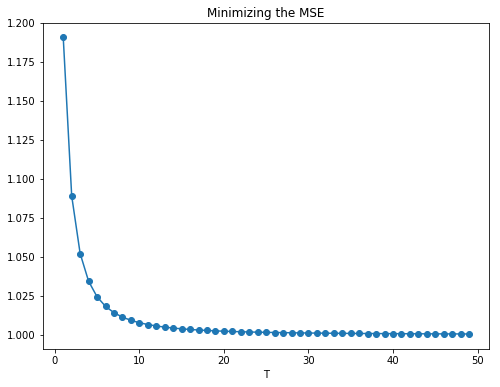

In [350]:
def V(T):
    return (3+ 2*T)**2/((1+2*T)*(5+2*T))
plt.subplots(figsize=(8, 6))
T_ = np.arange(1, 50)
plot(T_, V(T_), '-o')
xlabel('T')
title('Minimizing the MSE')
savefig('minMSE_T.png')

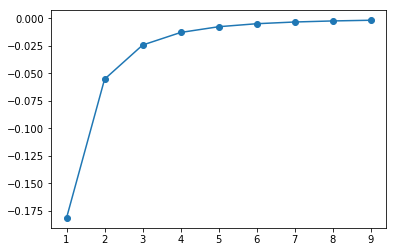

In [287]:
x = np.arange(1, 10)
plot(x, -16*(2*x+3)/((2*x + 1)**2 * (2*x + 5)**2), '-o')

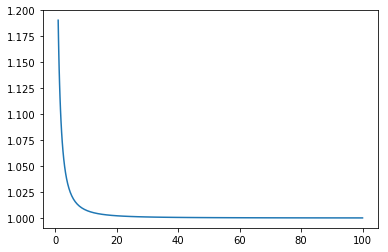

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [815]:
def beta(x):
    return ((3+2*x)/2)**(1/(3+2*x))
x = np.logspace(0, 2)
plot(x, 4*beta(x)**(6+4*x)/((1+2*x)*(5+2*x)))
savefig('minMse_T.png')

In [290]:
x=20
4*beta(x)**(6+4*x)/((1+2*x)*(5+2*x))

1.0021680216802207

In [338]:
def L(d, n, S):
    mu_1 = 1/d * np.sum(S[:d])
    if n-d!= 0: 
        mu_2 = 1/(n-d) * np.sum(S[d+1:])
    else:
        mu_2 = 0
    if d != 1:
        t_1 = 1/(d-1) * np.sum(np.square(S[:d] - mu_1))
    else: t_1 = 0
    if n-d != 1 and n-d != 0:
        t_2 = 1/(n-d-1) * np.sum(np.square(S[d+1:] - mu_2))
    else: t_2 = 0
    sigma2 = ((d-1)*t_1 + (n-d-1)*t_2)/(n-2)
    return -1/(2*sigma2)*np.sum(np.square(S[:d]-mu_1)) - 1/(2*sigma2)*np.sum(np.square(S[d+1:]-mu_2))

In [339]:
def dHat(S):
    n = len(S)
    maxL = float("-inf")
    maxd = 0
    for d in range(1, len(S)+1):
        temp = L(d, n, S)
        if temp > maxL:
            maxL = temp
            maxd = d
    return maxd

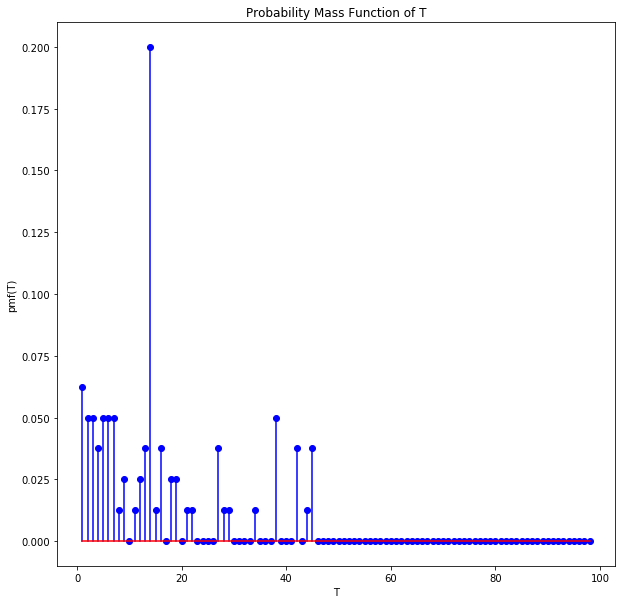

In [382]:
from collections import Counter
n_ = np.arange(20, 100, )
d = []
for n in n_:
    T_ = np.arange(1, n)
    d.append(dHat(V(T_)))
    
c = Counter(d)
c_ = []
for t in T_:
    c_.append(c[t])
pmf = np.array(c_)/np.sum(c_)
stem(T_, pmf, linefmt='b-', markerfmt='bo', basefmt='r-')
#plot(T_[:50], c_)
xlabel('T')
ylabel('pmf(T)')
title('Probability Mass Function of T')
#savefig('pmf_T.png')